<a href="https://colab.research.google.com/github/Nayoung-young/kaggle_practice/blob/main/Clothes_Size_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clothes-size-prediction 


*   출처: https://www.kaggle.com/tourist55/clothessizeprediction 



## 1. 데이터 전처리 
(8/10)

* 파일 업로드, 데이터 확인 
* data -> size_input, size_target으로 분리

(8/26) 
* Z-score로 Outlier 조정 
* XL 데이터 dropna (삭제) -> 최종 전처리 후: new_data_2


#### a. 데이터 업로드

In [1]:
from google.colab import files 
myfile = files.upload()

Saving clothes-size-prediction.csv to clothes-size-prediction.csv


In [2]:
import io 
import pandas as pd 

In [3]:
data = pd.read_csv(io.BytesIO(myfile['clothes-size-prediction.csv']))

#### b. 데이터 분포 확인

In [4]:
data.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [5]:
data.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
print(pd.unique(data['size']))
# size 몇 가지 있는지 확인

['XL' 'L' 'M' 'S' 'XXS' 'XXXL' 'XXL']


In [7]:
# Number of occurences for each size (target variable)
# https://www.kaggle.com/sharomeethan/clothing-size-predictor 
data["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

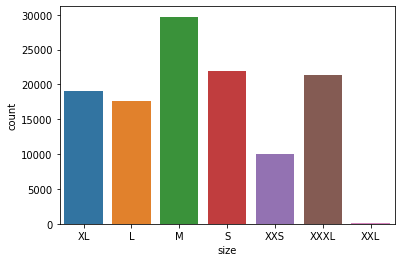

In [8]:
# Number of occurences for each size (target variable)
import seaborn as sns 
sns.countplot(x=data["size"])

Size M이 가장 common 

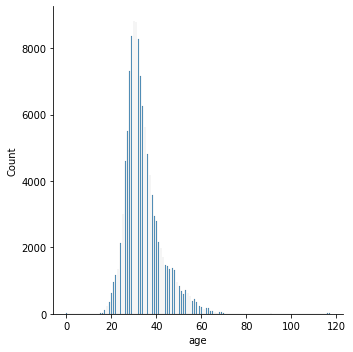

In [9]:
# Age distribution 
sns.displot(data["age"])

age는 주로 25~ 35세 사이 

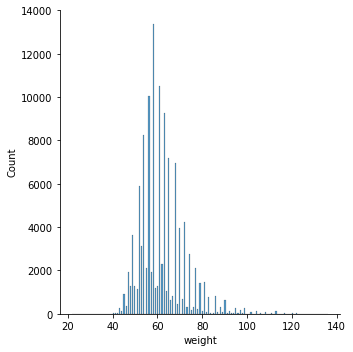

In [10]:
# Weight distribution
sns.displot(data["weight"])

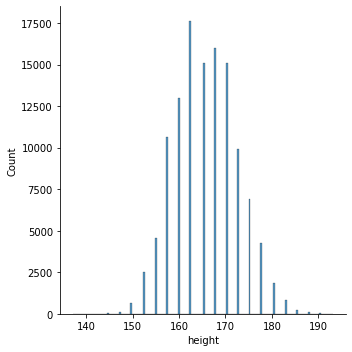

In [11]:
# height distribution
sns.displot(data["height"])

Weight, height는 정규분포에 가까움 

#### c. Removing Outliers 
**Outliers are extreme values that fall a long way outside of the other observations.** ... The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.

참고한 cell: https://www.kaggle.com/sharomeethan/clothing-size-predictor?scriptVersionId=68507616&cellId=18 
https://www.kaggle.com/nandalald/cloth-size-prediction-94-accuracy?scriptVersionId=68386622&cellId=13

In [27]:
# Outlier Removal Z-score 
# Outlier(사이즈)를 삭제(na로 변경?)하기 위한 근거로 각각의 Z-score를 계산하는 과정
dfs = []
sizes = []

for size_type in data['size'].unique(): 
  print(size_type)
  sizes.append(size_type) # sizes = [XL, L, M, S, XXS, XXXL, XXL]
  ndf = data[['age', 'height', 'weight']][data['size'] == size_type] 
  zscore = ((ndf - ndf.mean()) / ndf.std()) # 이때 ndf는 판다스 데이터프레임 형태 (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
  dfs.append(zscore)

dfs
# dfs는 각 사이즈에 해당하는 모든 age, weight, height 값의 z-score를 담고 있는 리스트 

XL
L
M
S
XXS
XXXL
XXL


[             age    height    weight
 0      -0.833326  0.767729 -0.660757
 24     -0.713290  1.539527  1.556338
 25     -0.353183 -1.161765 -0.291241
 28     -0.473219 -1.933562 -1.399788
 34      0.126960 -0.775866  0.447791
 ...          ...       ...       ...
 119705 -0.473219 -0.004068  0.817307
 119719  0.607102 -0.004068  0.447791
 119726 -0.113112  1.153628  0.447791
 119732 -0.473219 -0.004068  1.556338
 119733 -0.593254 -0.004068  0.817307
 
 [19119 rows x 3 columns],              age    height    weight
 1       0.221348  0.106734 -0.704865
 3      -0.896496  1.277532  0.596214
 12     -1.020701 -0.283532  0.379367
 14     -0.151267 -0.283532  0.596214
 15     -0.523881  0.106734  0.162521
 ...          ...       ...       ...
 119708 -0.275472 -1.064064  3.632064
 119711 -0.275472  0.497000  0.596214
 119712  0.097143 -1.064064 -0.271172
 119714  0.718167 -1.454331 -1.355404
 119718 -1.517520 -0.283532 -0.054326
 
 [17587 rows x 3 columns],              age    height    w

In [30]:
# removing Outliers 
# Z-score가 너무 크거나 작은 값을 조정(?)
for i in range(len(dfs)): 
  #print(sizes[i])
  dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age'] > -3) & (dfs[i]['age'] < 3)]
  dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height'] > -3) & (dfs[i]['height'] < 3)]
  dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight'] > -3) & (dfs[i]['weight'] < 3)]

In [33]:
# 현재 dfs에 size 열이 없는 상태이므로, 추가 
for i in range(len(sizes)):
  dfs[i]['size'] = sizes[i]

In [36]:
dfs[0].head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [32]:
# for test 
print(len(dfs))
print(type(dfs))
print(type(ndf))

dfs[0]['age']

7
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


0        -0.833326
24       -0.713290
25       -0.353183
28       -0.473219
34        0.126960
            ...   
119705   -0.473219
119719    0.607102
119726   -0.113112
119732   -0.473219
119733   -0.593254
Name: age, Length: 19119, dtype: float64

In [45]:
# dfs를 pandas 데이터 프레임으로 바꿔주기
print('기존 dfs의 데이터타입:', type(dfs)) 
print('---------------------------------------')
print('              <new_data>               ')
new_data = pd.concat(dfs)
print(new_data.head())
print('새로 만든 new_data의 데이터타입:', type(new_data))
print('---------------------------------------')

기존 dfs의 데이터타입: <class 'list'>
---------------------------------------
              <new_data>               
         age    height    weight size
0  -0.833326  0.767729 -0.660757   XL
24 -0.713290  1.539527  1.556338   XL
25 -0.353183 -1.161765 -0.291241   XL
28 -0.473219 -1.933562 -1.399788   XL
34  0.126960 -0.775866  0.447791   XL
새로 만든 new_data의 데이터타입: <class 'pandas.core.frame.DataFrame'>
---------------------------------------


Outlier(즉, Z-score >3 또는 <-3인 값)이 없는 것을 확인

In [50]:
new_data['age'][new_data['age'] < -3]

Series([], Name: age, dtype: float64)

#### c-2. Outlier 처리 전 data와 Outlier 처리 후 new_data의 분포 비교 

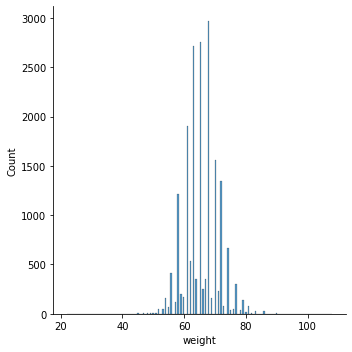

In [62]:
sns.displot(data["weight"][data["size"] == 'XL'])

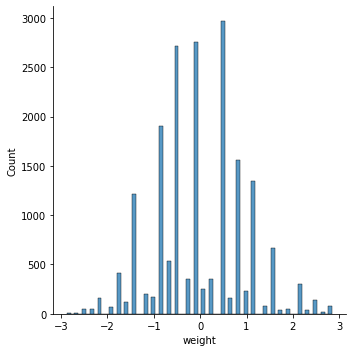

In [63]:
sns.displot(new_data["weight"][data["size"] == 'XL'])

In [60]:
print(data.describe())
print(new_data.describe())
# 각 값이

              weight            age         height
count  119734.000000  119477.000000  119404.000000
mean       61.756811      34.027311     165.805794
std         9.944863       8.149447       6.737651
min        22.000000       0.000000     137.160000
25%        55.000000      29.000000     160.020000
50%        61.000000      32.000000     165.100000
75%        67.000000      37.000000     170.180000
max       136.000000     117.000000     193.040000
                 age         height         weight
count  118056.000000  119187.000000  118665.000000
mean       -0.042107      -0.000913      -0.025820
std         0.904396       0.990493       0.931009
min        -2.524576      -2.935629      -2.971859
25%        -0.648086      -0.755108      -0.562824
50%        -0.216710      -0.028268      -0.049250
75%         0.396793       0.698573       0.596214
max         2.998008       2.911676       2.983292


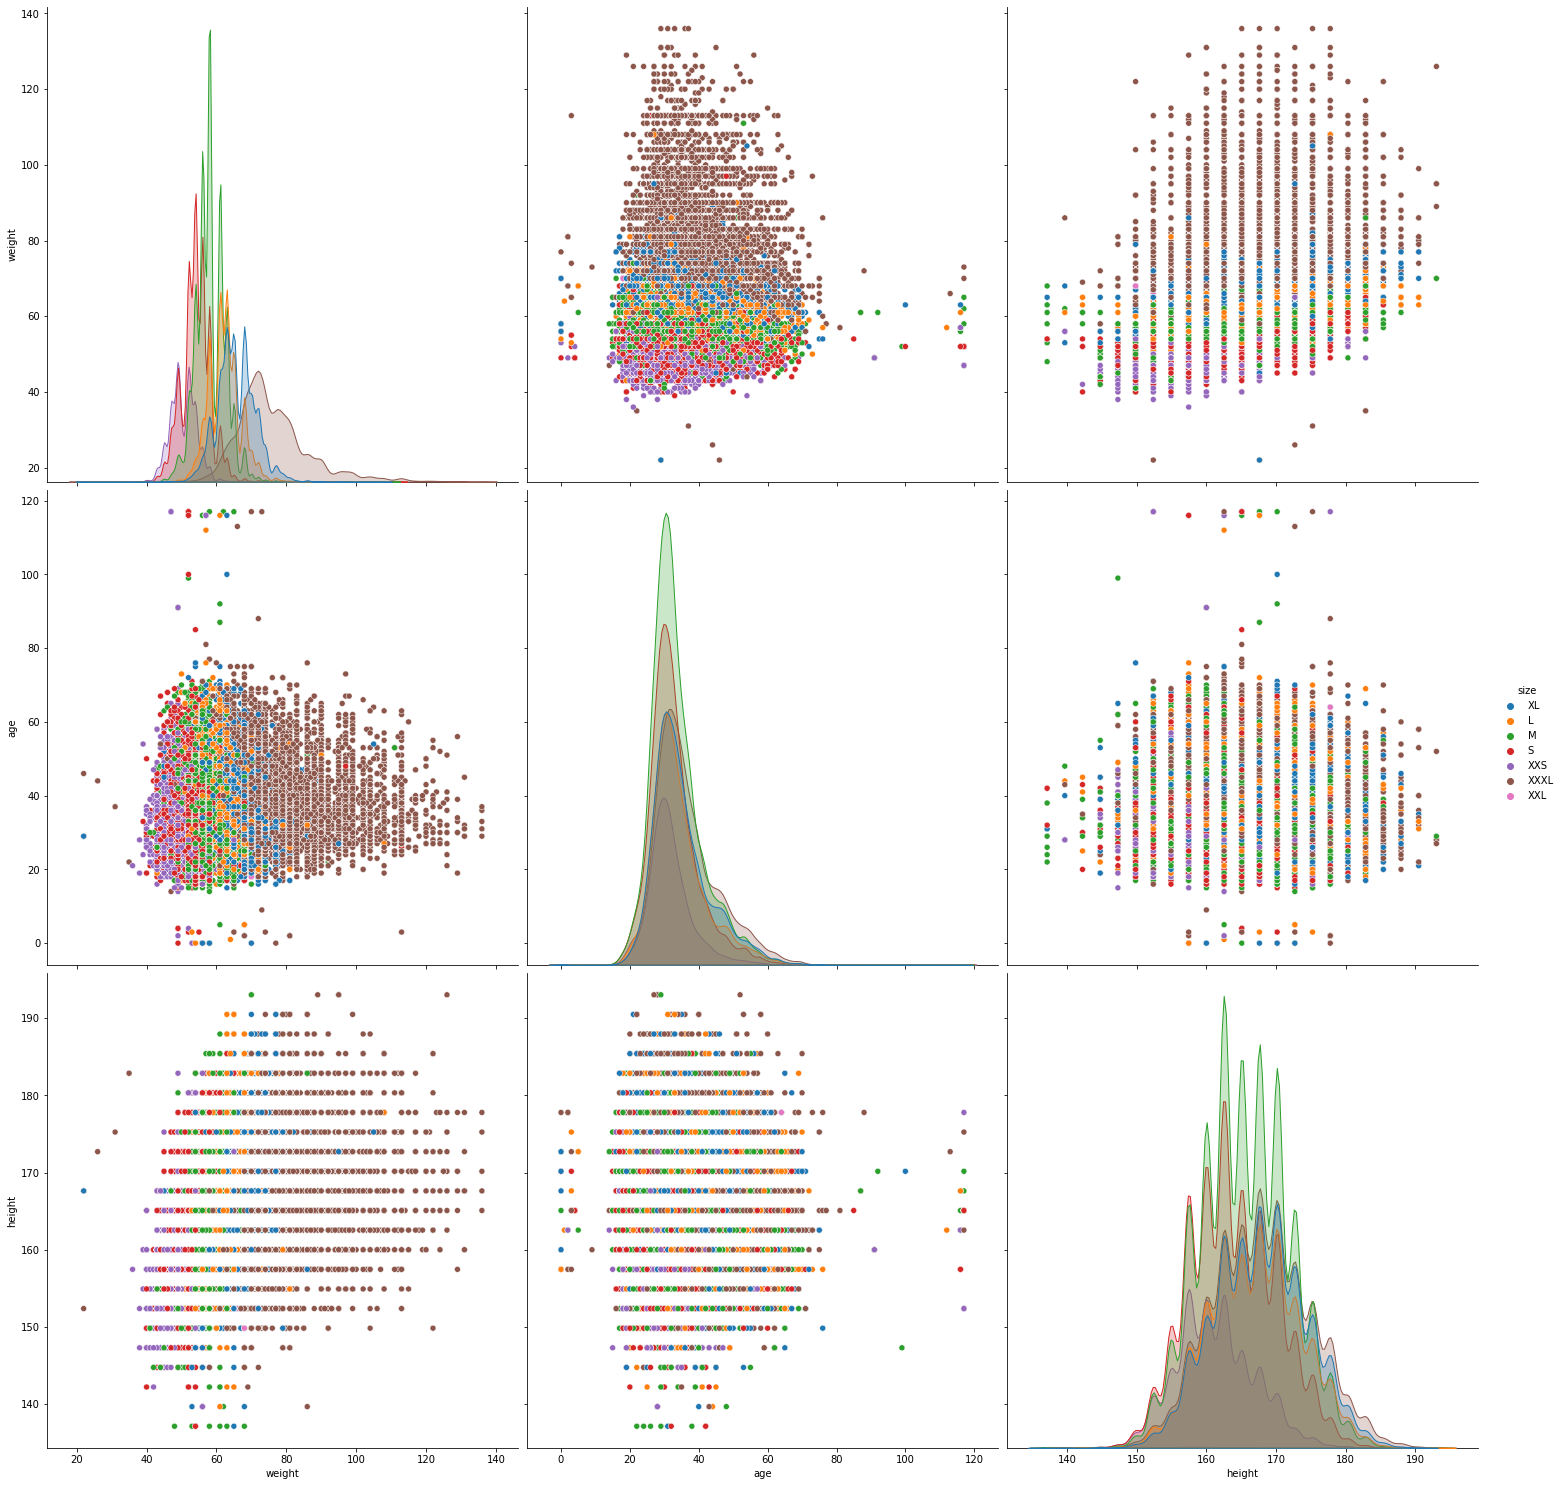

In [65]:
import matplotlib.pyplot as plt
sns.pairplot(data = data, hue='size', height = 7)
plt.show()

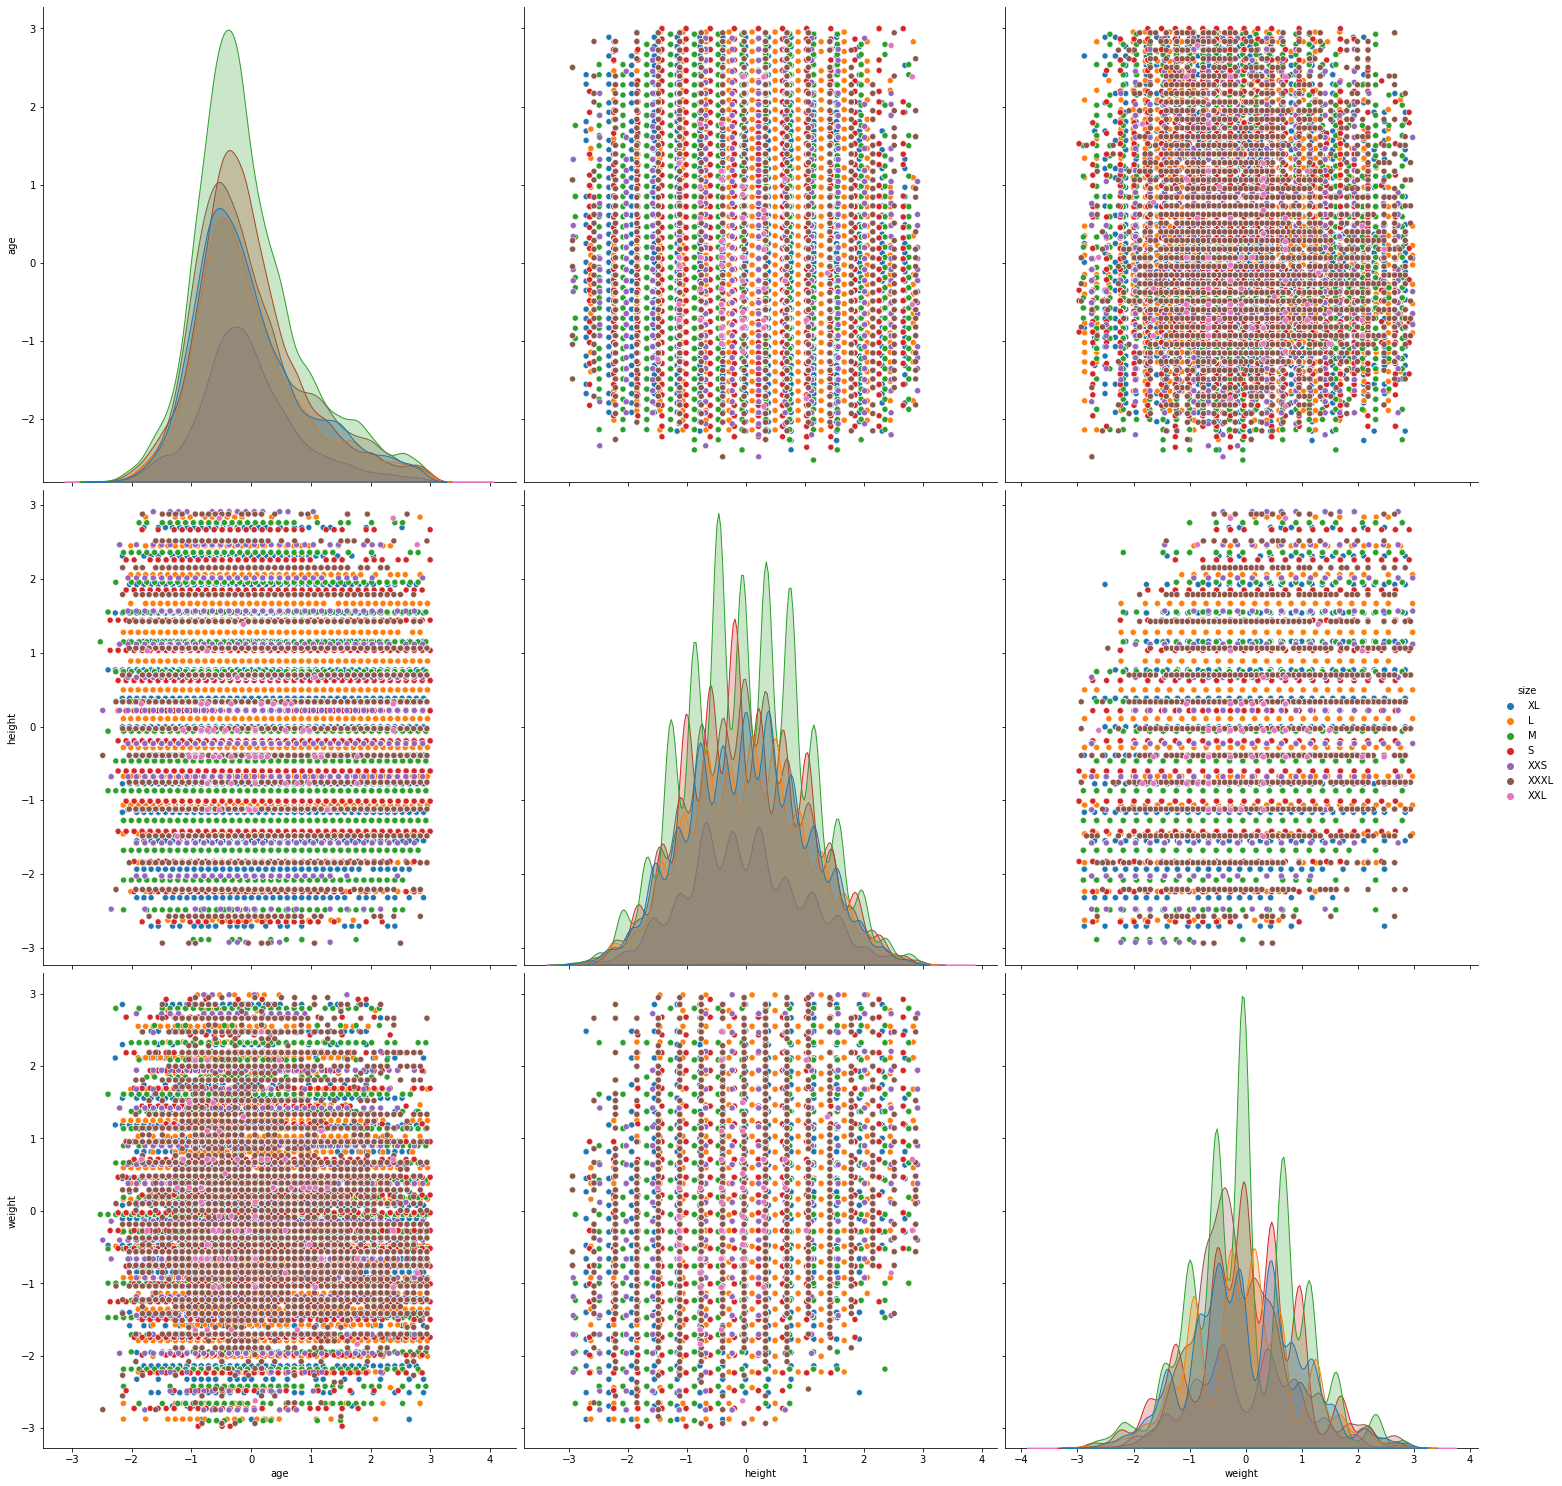

In [66]:
sns.pairplot(data = new_data, hue='size', height = 7)
plt.show()

#### d. Removing XXL size because of less count and dropna



In [46]:
import pandas as pd
import numpy as np

In [69]:
print(new_data['size'].value_counts())
print(data['size'].value_counts())

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64


In [70]:
new_data_2 = new_data[new_data['size'] != 'XXL'].copy()

In [72]:
new_data_2.dropna(how='any', inplace=True)

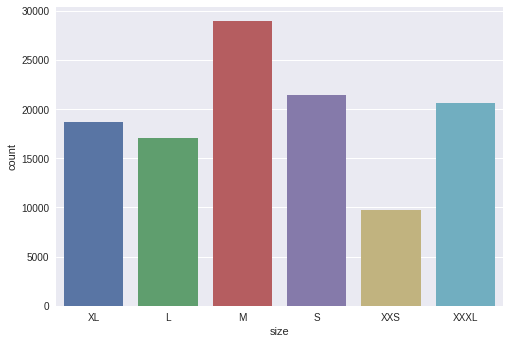

In [75]:
plt.style.use('seaborn')
sns.countplot(x = new_data_2['size'])
plt.show()

In [76]:
new_data_2['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL'], dtype=object)

In [55]:
# Outlier 처리 전 기존 data
data.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [77]:
# Outlier 처리 후 new_data
new_data.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [78]:
new_data_2.isna().sum()

age       0
height    0
weight    0
size      0
dtype: int64

## 2. Splitting and training

In [79]:
# size 그대로 사용 X, size_code 부여 
# https://www.kaggle.com/nandalald/cloth-size-prediction-94-accuracy?scriptVersionId=68386622&cellId=33 
size_code = {
    'XL':0,
    'L':1,
    'M':2,
    'S':3,
    'XXS':4,
    'XXXL':5
}
new_data_2['size'].replace(size_code, inplace=True)

In [80]:
new_data_2['size'].value_counts()

2    28934
3    21383
5    20654
0    18674
1    17075
4     9700
Name: size, dtype: int64

In [82]:
new_data_2.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,0
24,-0.713290,1.539527,1.556338,0
25,-0.353183,-1.161765,-0.291241,0
28,-0.473219,-1.933562,-1.399788,0
34,0.126960,-0.775866,0.447791,0


In [81]:
# size를 타깃 열로 설정, 나머지 3개 열은 입력 데이터로 사용 
size_input = new_data_2[['weight', 'age', 'height']].to_numpy()

In [83]:
print(size_input[:5])

[[-0.66075668 -0.83332551  0.76772906]
 [ 1.55633826 -0.71328986  1.53952659]
 [-0.29124086 -0.35318291 -1.16176479]
 [-1.39978833 -0.47321856 -1.93356233]
 [ 0.44779079  0.1269597  -0.77586602]]


In [86]:
size_target = new_data_2['size'].to_numpy()

In [87]:
print(size_target.shape)

(116420,)


In [90]:
from sklearn.model_selection import train_test_split 
train_input, test_input, train_target, test_target = train_test_split(
    size_input, size_target, test_size=0.25
)

In [91]:
print(train_input.shape, test_input.shape)
print(train_input[:5])

(87315, 3) (29105, 3)
[[-0.02592229  2.59616817  0.62389164]
 [ 0.16252077 -0.89649571  0.49699981]
 [-0.99775923 -0.31816801 -0.87000755]
 [ 0.19552548  1.61519276  1.4254129 ]
 [ 1.24675291 -0.39967646  0.49699981]]


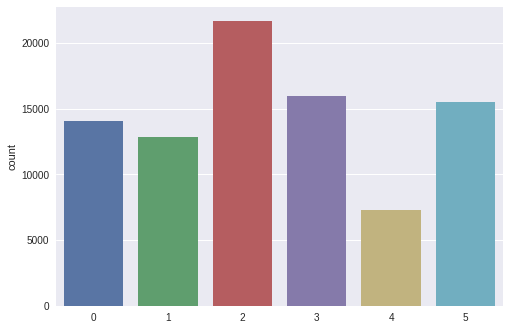

In [92]:
sns.countplot(x= train_target)
plt.show()

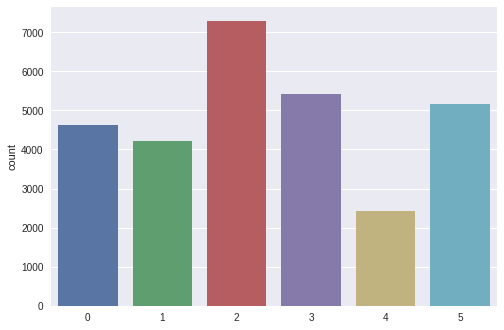

In [93]:
sns.countplot(x= test_target)
plt.show()

## 2. 여러 가지 모델 사용해보기 
(8/18)


* 로지스틱 회귀 
* 결정 트리 
* 앙상블

{8/26)
* 전처리 다시 해서 재시도 => 성능 개높아짐 (로지스틱 회귀 빼고)

###로지스틱 회귀
- 확률적 경사 하강법 (p208)하려고 하니 dataconversionwarning: target 형태가 2차원이라서 그런 듯 -> 내가 to_numpy 변환을 2차원으로 했었다 (수정함)
- p224로 retry

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.24796426730802268
0.2502319189142759


In [96]:
print(lr.coef_, lr.intercept_)

[[ 0.0183965   0.00220825 -0.00573429]
 [ 0.00874814  0.00507467  0.0050528 ]
 [ 0.01113646  0.00040258 -0.0025414 ]
 [ 0.01221292 -0.01118225 -0.00310527]
 [-0.00440674 -0.01389741 -0.00521592]
 [-0.04608727  0.01739416  0.01154408]] [ 0.01593559 -0.07389359  0.44744157  0.14294312 -0.64439691  0.11197022]


### 결정 트리

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.9997594914963065


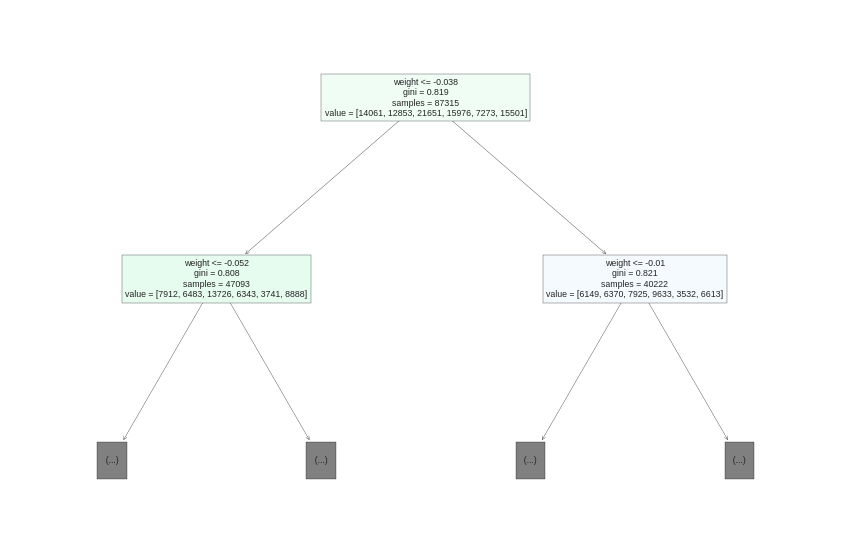

In [101]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dt, max_depth = 1, filled=True, feature_names = ['weight', 'age', 'height'])
plt.show()

### 앙상블 

In [97]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_jobs=-1)

scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9982019126152437
